In [1]:
# this shows the use and transfer of data and models across CPU and GPU

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

In [4]:
# On Apple Silicon Macs (M1 / M2 / M4 Pro), GPU = MPS (Metal Performance Shaders), not CUDA.

#checking if GPU available , (both should be True)
print(torch.backends.mps.is_available()) 
print(torch.backends.mps.is_built())

True
True


In [5]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)

mps


Build a simple model

In [9]:
# this model is constructed on CPU
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
)
print(next(net.parameters()).device)

cpu


In [19]:
# make some data
#data also on CPU
data  = torch.randn(1000,20) # samples X features
labels = torch.randint(low=0, high=2, size=(1,1000))
print(data.device)

cpu


In [22]:
# send the model and data to GPU
net.to(device)

# data = data.to(device) #data could also be send in place as well
data = data.to(device)
labels = labels.to(device)


In [23]:
print(next(net.parameters()).device)
print(data.device)
print(labels.device)

mps:0
mps:0
mps:0


In [24]:
data # note the device = 'mps:0'

tensor([[ 1.6820,  1.4782, -1.9745,  ..., -0.7563, -0.6539, -0.4978],
        [-2.3056, -1.5961, -0.3067,  ..., -0.1395,  0.6848,  1.5434],
        [-0.8810, -0.6352,  0.3070,  ...,  0.6272, -1.7864,  0.6587],
        ...,
        [-0.1393, -0.6178,  0.7714,  ..., -0.5566,  0.4932, -0.7050],
        [ 0.2533, -0.4236,  0.1474,  ..., -0.3841, -0.5746, -1.5299],
        [ 0.7490, -0.2993, -0.5315,  ..., -1.9279, -1.6765, -0.4460]],
       device='mps:0')

NOTE:
    
    .to() is only available for Pytorch variables, not a generic Python function

In [25]:
# you can also create data directly on GPU
dataG = torch.randn((1000,20),device =device)
dataC = torch.randn((1000,20),device ='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)


mps:0
mps:0
cpu


Geting results from model

In [27]:
output  =  net(dataC)
#this throw error as data in CPU, but model in GPU

RuntimeError: Tensor for argument input is on cpu but expected on mps

In [28]:
output = net(data)

In [29]:
output.device # output is now in GPU

device(type='mps', index=0)

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

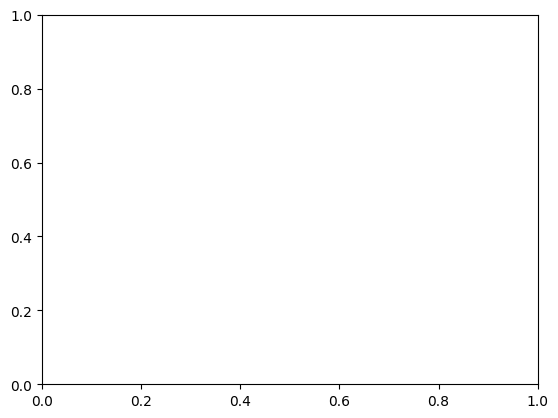

In [31]:
# try to plot the data
plt.plot(output.detach())
# as output is still in GPU, this throw error
# we need to push back output to CPU and then visualize

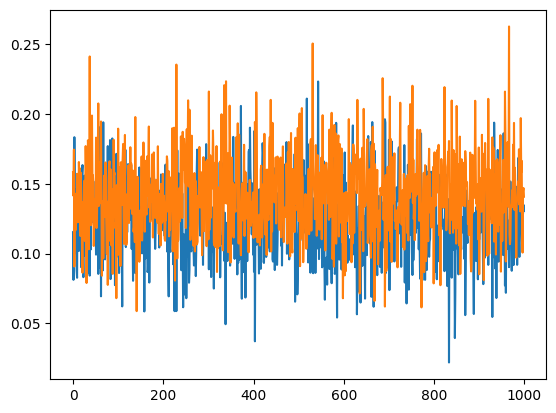

In [32]:
plt.plot(output.detach().cpu())
#if the pytorch variable has just 1 no, you can use variable.item() isntead of variable.detach().cpu()

In [37]:
output.detach()

tensor([[0.1153, 0.1583],
        [0.0812, 0.1413],
        [0.1022, 0.1744],
        ...,
        [0.1287, 0.1445],
        [0.1349, 0.1469],
        [0.1304, 0.1407]], device='mps:0')